# Camera Data

In this notebook, we will explore the access to camera data at various locations and visualize them.

We first import the required modules of the library and adjust the parameters.

In [33]:
%load_ext autoreload
%autoreload 2

import os
import sys
sys.path.insert(0, '../src')

import numpy as np

from deepverse import ParameterManager
from deepverse import Dataset

from pprint import pprint

# Path to the MATLAB configuration file
config_path = os.path.join("../params/config.m")

# Initialize ParameterManager and load parameters
param_manager = ParameterManager(config_path)

param_manager.params['dataset_folder'] = r'D:\DeepVerse\scenarios'
param_manager.params['scenario'] = 'Town01-Carla'

# # Print the parameters
print("Loaded Parameters:")
pprint(param_manager.params)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Loaded Parameters:
{'basestations': [1],
 'camera': True,
 'camera_id': [1, 2, 3, 4, 5],
 'comm': {'OFDM': {'bandwidth': 0.05,
                   'selected_subcarriers': [0, 1],
                   'subcarriers': 512},
          'activate_RX_filter': 0,
          'bs_antenna': {'FoV': [360, 180],
                         'rotation': [5, 10, 20],
                         'shape': [32, 1],
                         'spacing': 0.5},
          'enable': True,
          'enable_Doppler': 1,
          'generate_OFDM_channels': 1,
          'num_paths': 25,
          'ue_antenna': {'FoV': [360, 180],
                         'rotation': [0, 30, 0],
                         'shape': [1, 1],
                         'spacing': 0.5}},
 'dataset_folder': 'D:\\DeepVerse\\scenarios',
 'lidar': True,
 'position': True,
 'radar': {'FMCW': {'Fs': 4000000.0,
                    'chirp_slope': 15000000000000.0,
       

As it can be seen from the printed parameters, there are 2 relevant parameters to the camera images. Specifically, 
- *`camera` parameter*: Enables if the camera data will be included in the dataset. It is required to be `True` to be able to access to the camera data. 
- *`scenes` parameter*: Determines which scenes to be included in the dataset. In this example, it is set to the samples $100$ and $101$. Thus, we will have only two samples available.

Let us now generate the dataset:

In [34]:
dataset = Dataset(param_manager)


Scene 1/2

Basestation 1


Generating channels: 100%|██████████| 1/1 [00:04<00:00,  4.89s/it]



Scene 2/2

Basestation 1


Generating channels: 100%|██████████| 1/1 [00:04<00:00,  4.78s/it]



Scene 1/2

Basestation 1

UE-BS Channels


Generating channels: 100%|██████████| 2/2 [00:00<00:00, 999.95it/s]



BS-BS Channels


Generating channels: 100%|██████████| 1/1 [00:00<00:00, 199.94it/s]



Scene 2/2

Basestation 1

UE-BS Channels


Generating channels: 100%|██████████| 2/2 [00:00<00:00, 999.60it/s]



BS-BS Channels


Generating channels: 100%|██████████| 1/1 [00:00<00:00, 249.59it/s]


### Accessing Camera Data

Let us now explore the available camera information, including the locations, directions, resolution of the cameras.

#### List of Available Camera Sensors

In [35]:
camera_dataset = dataset.get_modality('cam')
camera_dataset.list_sensors()

{'cam0': CameraSensor(id=cam0, rotation=[0, 0, 90], location=[10, 20, 30], FoV=120, files=2001 files),
 'cam1': CameraSensor(id=cam1, rotation=[0, 0, 90], location=[10, 20, 30], FoV=120, files=2001 files),
 'cam2': CameraSensor(id=cam2, rotation=[0, 0, 90], location=[10, 20, 30], FoV=120, files=2001 files),
 'cam3': CameraSensor(id=cam3, rotation=[0, 0, 90], location=[10, 20, 30], FoV=120, files=2001 files),
 'cam4': CameraSensor(id=cam4, rotation=[0, 0, 90], location=[10, 20, 30], FoV=120, files=2001 files),
 'cam5': CameraSensor(id=cam5, rotation=[0, 0, 90], location=[10, 20, 30], FoV=120, files=2001 files),
 'cam6': CameraSensor(id=cam6, rotation=[0, 0, 90], location=[10, 20, 30], FoV=120, files=2001 files),
 'cam7': CameraSensor(id=cam7, rotation=[0, 0, 90], location=[10, 20, 30], FoV=120, files=2001 files),
 'cam8': CameraSensor(id=cam8, rotation=[0, 0, 90], location=[10, 20, 30], FoV=120, files=2001 files),
 'cam9': CameraSensor(id=cam9, rotation=[0, 0, 90], location=[10, 20, 30]

Here, we have the information of the all camera data listed in a dictionary. Based on the desired camera, we can access to the relevant data.

*Note:* The `files` list the total number of available files in the dataset subdirectory corresponding to the sensor. Out of these files, however, only the relevant scenes are directly accessable in the dataset object.

Now, let us obtain samples from the cameras $3, 4, 5$ for the first `scene` index, $100$, as follows:

In [36]:
image_path = dataset.get_sample('cam', device_index='cam3', index=0)
print(image_path)
image_path = dataset.get_sample('cam', device_index='cam4', index=0)
print(image_path)
image_path = dataset.get_sample('cam', device_index='cam5', index=0)
print(image_path)

D:\DeepVerse\scenarios\Town01-Carla\RGB_images\cam3\100.jpg
D:\DeepVerse\scenarios\Town01-Carla\RGB_images\cam4\100.jpg
D:\DeepVerse\scenarios\Town01-Carla\RGB_images\cam5\100.jpg


We can also access the devices by their order index in the camera sensor dictionary. In the printed camera dictionary above, cam3 corresponds to 4th camera. Then, we can use the following commands to access data:

In [37]:
image_path = dataset.get_sample('cam', device_index=4, index=0)
print(image_path)
image_path = dataset.get_sample('cam', device_index=5, index=0)
print(image_path)
image_path = dataset.get_sample('cam', device_index=6, index=0)
print(image_path)

D:\DeepVerse\scenarios\Town01-Carla\RGB_images\cam4\100.jpg
D:\DeepVerse\scenarios\Town01-Carla\RGB_images\cam5\100.jpg
D:\DeepVerse\scenarios\Town01-Carla\RGB_images\cam6\100.jpg


Further, in the case we need a set of samples at different time indices together, we can access to the data using list or numpy arrays.

In [39]:
image_path = dataset.get_sample('cam', device_index=4, index=[0, 1])
print(image_path)

['D:\\DeepVerse\\scenarios\\Town01-Carla\\RGB_images\\cam4\\100.jpg'
 'D:\\DeepVerse\\scenarios\\Town01-Carla\\RGB_images\\cam4\\101.jpg']


In [42]:
image_path = dataset.get_sample('cam', device_index='cam4', index=[0, 1])
print(image_path)

['D:\\DeepVerse\\scenarios\\Town01-Carla\\RGB_images\\cam4\\100.jpg'
 'D:\\DeepVerse\\scenarios\\Town01-Carla\\RGB_images\\cam4\\101.jpg']


#### Visualization with DeepVerse6G

One can visualize the camera images using the paths and classical methods. Alternatively, we also provide built-in methods to visualize the data easily.

Let us first import the visualizer to print the available backends:

In [45]:
from deepverse.visualizers import ImageVisualizer
print(ImageVisualizer.supported_backends)


['pillow', 'matplotlib', 'opencv', 'plotly']


To visualize, however, we do not need to import. We can just set the backend, and call the dataset to visualize the sample.

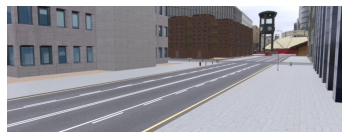

In [ ]:
dataset.set_visualization_backend('cam', 'matplotlib')
dataset.visualize('cam', device_index='cam4', sample_index=0)

In [ ]:
# dataset.set_visualization_backend('cam', 'plotly')
# dataset.visualize('cam', device_index='cam4', sample_index=0)